>hunet [Big Data 한입] 파이썬을 활용한 경영데이터 분석 강의 (교수 : 가톨릭대학교 이홍주 교수님) 실습 파일입니다.  
>실습 자료를 토대로 추가적인 코드 작성, 자료 정리를 함께 했습니다.

# 군집화 (clustering)란?
* 전체 데이터에서 유사한 데이터들끼리 군집을 만드는 것
* 데이터 탐색의 일환으로 전체 데이터를 구성하고 있는 부분집합을 파악하고, 부분집합별로 어떠한 차이가 있는지 확인 가능
* 클러스터링 대표 방법
  * k-평균(k-means) 군집화 
  * 계층(hierarchical) 군집화
  * 자기조직화 맵(self-organizing map)

# 1. k-평균(k-means) 군집화 
* 수행 단계
  * 1단계 : k개의 초기점(seed)을 임의로 정함
  * 2단계 : 각 데이터와 k개의 초기점간의 유사도를 계산하고, 각 데이터를 가장 가까운 초기점에 할당
  * 3단계 : 가장 가까운 초기점이 같은 데이터들끼리 군집으로 묶고, 군집에 속한 데이터들의 평균을 군집의 중심(centroid)으로 함
  * 4단계 : 이 중심이 다음 단계를 수행하기 위한 새로운 초기점이 됨, 2단계로 이동
  * 5단계 : 2단계, 3단계가 반복되다가 군집에 속하는 데이터 집합이 변화가 없을 때 멈춤.


## 예제로 실습하기
1. 필요한 라이브러리 임포트

In [108]:
# 파일 경로
from glob import glob
# Warnings 제거
import warnings
warnings.filterwarnings('ignore')
# 군집화 알고리즘
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# 데이터 분석
import pandas as pd
import numpy as np
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [29]:
# seaborn 테마
sns.set_theme()

2. x, y좌표 상의 9개 점을 k-평균 군집화 해보기
* 3개 군집

In [110]:
points = [(3,5),(4,6),(5,3),(3,7),(6,8),(7,4),(4,8),(7,3),(8,2)]
labels = ['x', 'y']
# 데이터프레임 생성
df = pd.DataFrame(points, columns=labels)
df.head()

,x,y
0,3,5
1,4,6
2,5,3
3,3,7
4,6,8


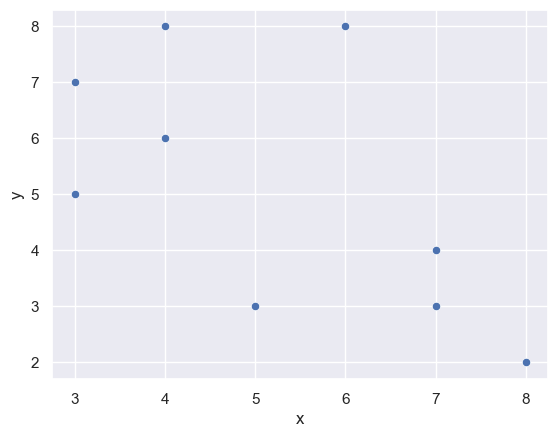

In [111]:
# 산점도 
sns.scatterplot(data=df, x='x', y='y');

In [112]:
# 군집화 하기
# n_clusters : 생성할 군집 수 지정
# init : 초기점을 생성해주는 방안 (random으로 지정한 경우 KMeans 반복 수행시 결과가 달라짐)
model = KMeans(n_clusters=3, init='random')
model.fit(df)

KMeans(init='random', n_clusters=3)

In [113]:
# 군집 결과 확인하기
pred = model.predict(df)
df_pred = pd.DataFrame(pred, columns=['predict'])
df_cluster = pd.concat([df, df_pred], axis=1)
df_cluster

,x,y,predict
0,3,5,0
1,4,6,0
2,5,3,2
3,3,7,0
4,6,8,1
5,7,4,2
6,4,8,1
7,7,3,2
8,8,2,2


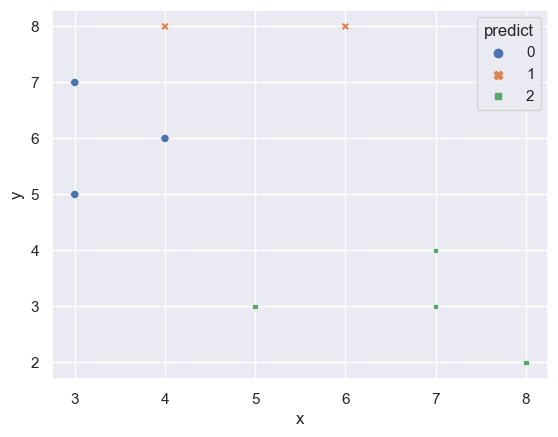

In [114]:
# 결과 시각화
sns.scatterplot(data=df_cluster, x='x', y='y', hue='predict', 
                palette='deep', style='predict');

* 2개 군집으로 해보기

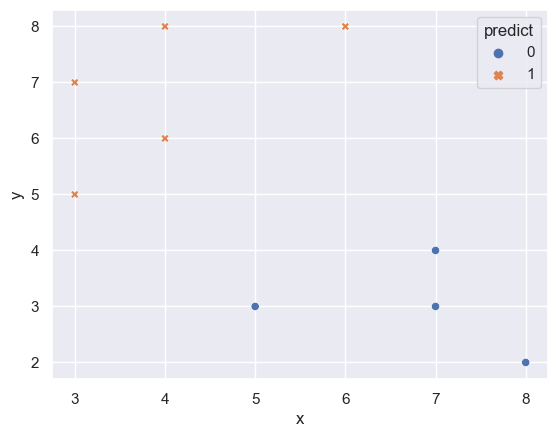

In [115]:
# 군집화 하기
# n_clusters : 생성할 군집 수 지정
# init : 초기점을 생성해주는 방안 (random으로 지정한 경우 KMeans 반복 수행시 결과가 달라짐)
model = KMeans(n_clusters=2, init='random')
model.fit(df)
# 군집 결과 확인하기
pred = model.predict(df)
df_pred = pd.DataFrame(pred, columns=['predict'])
df_cluster = pd.concat([df, df_pred], axis=1)
# 결과 시각화
sns.scatterplot(data=df_cluster, x='x', y='y', hue='predict', 
                palette='deep', style='predict');

## 통신사 이탈, 비이탈 고객 데이터로 군집화

In [40]:
file_path = '/Users/kmr/Desktop/PythonWorkspace/practice/down_data'
file_list = sorted(glob(f'{file_path}/*'))
file_list

['/Users/kmr/Desktop/PythonWorkspace/practice/down_data/Building_Permits.csv',
 '/Users/kmr/Desktop/PythonWorkspace/practice/down_data/MoviePerformance.csv',
 '/Users/kmr/Desktop/PythonWorkspace/practice/down_data/ab_test_goal.csv',
 '/Users/kmr/Desktop/PythonWorkspace/practice/down_data/ab_test_imp.csv',
 '/Users/kmr/Desktop/PythonWorkspace/practice/down_data/bank-additional-full.csv',
 '/Users/kmr/Desktop/PythonWorkspace/practice/down_data/boston.csv',
 '/Users/kmr/Desktop/PythonWorkspace/practice/down_data/customer5.csv',
 '/Users/kmr/Desktop/PythonWorkspace/practice/down_data/customer5.xlsx',
 '/Users/kmr/Desktop/PythonWorkspace/practice/down_data/customer6.csv',
 '/Users/kmr/Desktop/PythonWorkspace/practice/down_data/customerAll.csv',
 '/Users/kmr/Desktop/PythonWorkspace/practice/down_data/customerChurn.csv',
 '/Users/kmr/Desktop/PythonWorkspace/practice/down_data/customerRegression.csv',
 '/Users/kmr/Desktop/PythonWorkspace/practice/down_data/customerRegressionTest.csv',
 '/Users

In [116]:
# telecom 데이터셋 데이터프레임 생성하기.
for fn in file_list:
    if 'telecom' in fn:
        df = pd.read_csv(f'{fn}')
print('데이터프레임 shape :', df.shape)
df.head()

데이터프레임 shape : (1477, 15)


,ID,LONGDIST,International,LOCAL,DROPPED,PAY_MTHD,LocalBillType,LongDistanceBillType,AGE,SEX,STATUS,CHILDREN,Est_Income,Car_Owner,CHURNED
0,0,5.24640,7.51510,86.32780,0,CH,FreeLocal,Standard,57,F,M,2,27535.3,Y,Vol
1,3,0.00000,0.00000,3.94229,0,CC,Budget,Intnl_discount,50,F,S,2,64632.3,N,InVol
2,4,5.55564,0.00000,9.36347,1,CC,Budget,Intnl_discount,68,F,M,2,81000.9,N,Vol
3,8,14.01930,5.68043,29.80650,0,CC,Budget,Standard,34,M,S,0,87467.1,Y,Current
4,10,13.66400,2.95642,32.63810,0,CC,FreeLocal,Intnl_discount,60,M,M,2,83220.6,N,Vol


* 데이터 정보 파악하기

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1477 non-null   int64  
 1   LONGDIST              1477 non-null   float64
 2   International         1477 non-null   float64
 3   LOCAL                 1477 non-null   float64
 4   DROPPED               1477 non-null   int64  
 5   PAY_MTHD              1477 non-null   object 
 6   LocalBillType         1477 non-null   object 
 7   LongDistanceBillType  1477 non-null   object 
 8   AGE                   1477 non-null   int64  
 9   SEX                   1477 non-null   object 
 10  STATUS                1477 non-null   object 
 11  CHILDREN              1477 non-null   int64  
 12  Est_Income            1477 non-null   float64
 13  Car_Owner             1477 non-null   object 
 14  CHURNED               1477 non-null   object 
dtypes: float64(4), int64(

In [64]:
# 수치형 타입만 불러오기
df.select_dtypes(include='number')

,ID,LONGDIST,International,LOCAL,DROPPED,AGE,CHILDREN,Est_Income
0,0,5.24640,7.51510,86.327800,0,57,2,27535.3
1,3,0.00000,0.00000,3.942290,0,50,2,64632.3
2,4,5.55564,0.00000,9.363470,1,68,2,81000.9
3,8,14.01930,5.68043,29.806500,0,34,0,87467.1
4,10,13.66400,2.95642,32.638100,0,60,2,83220.6
...,...,...,...,...,...,...,...,...
1472,4991,0.00000,0.00000,0.731089,0,75,0,41138.2
1473,4993,0.00000,0.00000,1.107290,0,95,2,52997.5
1474,4996,9.08244,7.04035,13.039500,0,70,1,85192.9
1475,4998,22.62210,0.00000,25.763100,0,37,0,11693.3


* 결측치 확인하기

In [65]:
df.isnull().sum()

ID                      0
LONGDIST                0
International           0
LOCAL                   0
DROPPED                 0
PAY_MTHD                0
LocalBillType           0
LongDistanceBillType    0
AGE                     0
SEX                     0
STATUS                  0
CHILDREN                0
Est_Income              0
Car_Owner               0
CHURNED                 0
dtype: int64

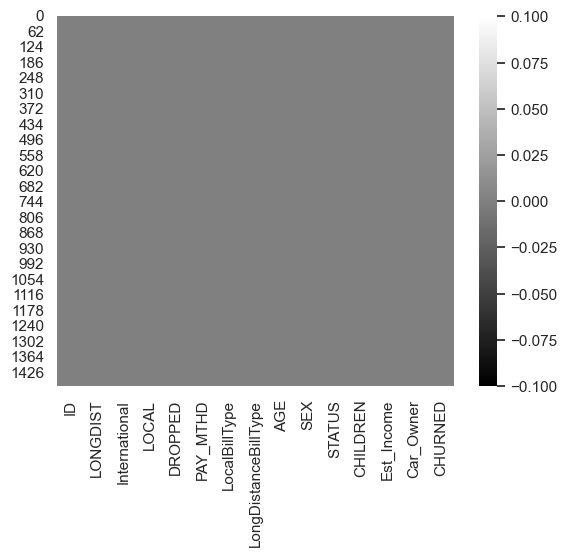

In [67]:
sns.heatmap(data=df.isnull(), cmap='gray');

* 중복값 확인

In [70]:
print('중복값 제거 전 shape :', df.shape)
print('중복값 제거 후 shape :', df.drop_duplicates().shape)
df.loc[df.duplicated()]

중복값 제거 전 shape : (1477, 15)
중복값 제거 후 shape : (1477, 15)


,ID,LONGDIST,International,LOCAL,DROPPED,PAY_MTHD,LocalBillType,LongDistanceBillType,AGE,SEX,STATUS,CHILDREN,Est_Income,Car_Owner,CHURNED


* 기술통계 확인

In [48]:
# 수치형
df.describe()

,ID,LONGDIST,International,LOCAL,DROPPED,AGE,CHILDREN,Est_Income
count,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000
mean,2516.076506,13.637284,0.836382,51.364432,0.123223,57.562627,0.989167,50290.691485
std,1466.860125,9.394239,2.236858,54.682594,0.424179,22.842655,0.824681,28445.207066
min,0.000000,0.000000,0.000000,0.049147,0.000000,18.000000,0.000000,110.284000
25%,1229.000000,5.173330,0.000000,13.460000,0.000000,38.000000,0.000000,25445.600000
50%,2570.000000,13.683000,0.000000,35.014400,0.000000,58.000000,1.000000,50290.700000
75%,3772.000000,22.078400,0.000000,71.661400,0.000000,77.000000,2.000000,75004.500000
max,4999.000000,29.982000,9.950900,450.624000,4.000000,97.000000,2.000000,99832.900000


In [49]:
# 범주형 
df.describe(include='object')

,PAY_MTHD,LocalBillType,LongDistanceBillType,SEX,STATUS,Car_Owner,CHURNED
count,1477,1477,1477,1477,1477,1477,1477
unique,3,2,2,2,2,2,3
top,CC,Budget,Standard,F,M,N,Current
freq,854,748,1018,748,876,1016,832


* 이탈여부 고유값 확인
  * 'Current' : 현재 고객
  * 'Vol' : 자발적 이탈
  * 'InVol' : 비자발적 이탈
 

In [54]:
sorted(list(df.CHURNED.unique()))

['Current', 'InVol', 'Vol']

* 군집화 하기
  * feature 선정 : 전화 사용 시간 변수 3가지
  * 군집 개수 : 3개 (이탈여부 고유값에 맞춤)

In [77]:
columns_list = list(df.select_dtypes(include='number').columns)
columns_list

['ID',
 'LONGDIST',
 'International',
 'LOCAL',
 'DROPPED',
 'AGE',
 'CHILDREN',
 'Est_Income']

In [78]:
del columns_list[0]
del columns_list[3:]
feature_name = columns_list
feature_name

['LONGDIST', 'International', 'LOCAL']

In [117]:
# KMeans 군집화
model = KMeans(n_clusters=3, random_state=42)
model.fit(df[feature_name])

KMeans(n_clusters=3, random_state=42)

In [81]:
# 군집화 결과 확인
pred = model.predict(df[feature_name])
df_pred = pd.DataFrame(pred, columns=['cluster'])
tele_cluster = pd.concat([df[feature_name], df_pred], axis=1)
tele_cluster.head()

,LONGDIST,International,LOCAL,cluster
0,5.24640,7.51510,86.32780,0
1,0.00000,0.00000,3.94229,1
2,5.55564,0.00000,9.36347,1
3,14.01930,5.68043,29.80650,1
4,13.66400,2.95642,32.63810,1


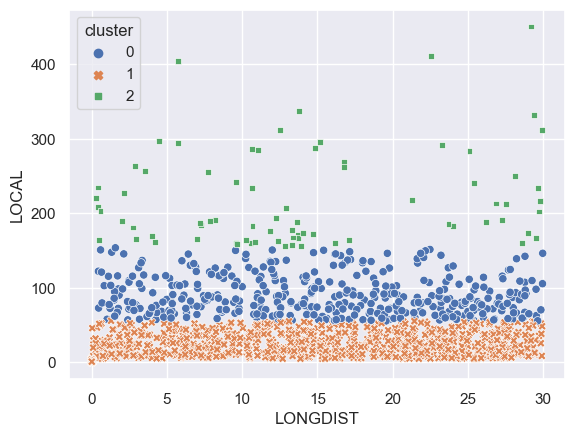

In [84]:
# 산점도 그리기
sns.scatterplot(data=tele_cluster, x='LONGDIST', y='LOCAL'
                ,hue='cluster', palette='deep', style='cluster'
                );

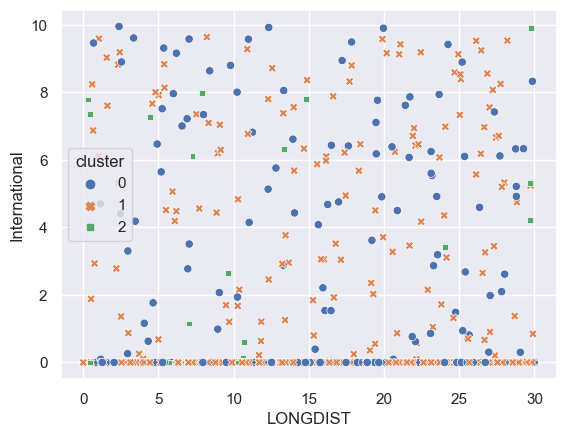

In [85]:
# 산점도 그리기
sns.scatterplot(data=tele_cluster, x='LONGDIST', y='International'
                ,hue='cluster', palette='deep', style='cluster'
                );

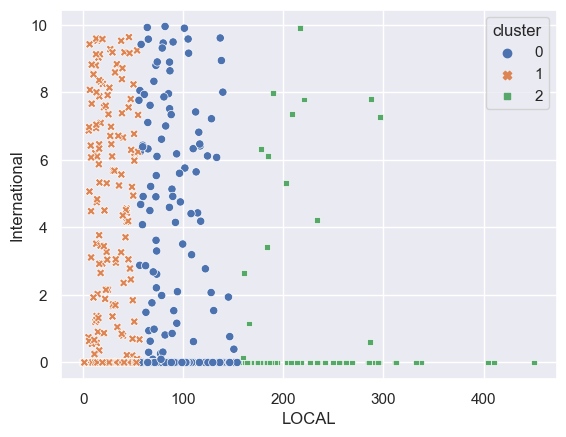

In [86]:
# 산점도 그리기
sns.scatterplot(data=tele_cluster, x='LOCAL', y='International'
                ,hue='cluster', palette='deep', style='cluster'
                );

### 질문 : LOCAL이 미치는 영향이 커서 위와 같은 군집화 결과가 나온 것일까?
* 기술통계를 다시 확인해보자.
* LOCAL이 International, LONGDIST 보다 값의 범위가 크기때문에 더 많은 영향을 미친 것으로 확인.
> 주의! 각 변수의 범위를 항상 고려할 것
* 해결 방안 : 변수들의 스케일링이 필요함.

In [87]:
df[feature_name].describe()

,LONGDIST,International,LOCAL
count,1477.000000,1477.000000,1477.000000
mean,13.637284,0.836382,51.364432
std,9.394239,2.236858,54.682594
min,0.000000,0.000000,0.049147
25%,5.173330,0.000000,13.460000
50%,13.683000,0.000000,35.014400
75%,22.078400,0.000000,71.661400
max,29.982000,9.950900,450.624000


<Axes: >

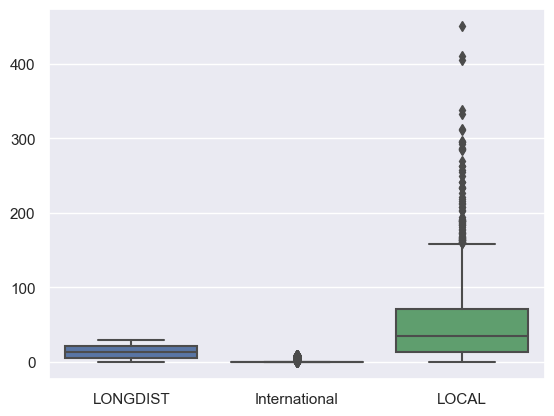

In [90]:
sns.boxplot(data=df[feature_name])

### 데이터 스케일링
1. min-max : 최대, 최소를 이용하여 모든 변수를 0과 1 사이의 값으로 변경 
2. standard : 표준정규분포 = (변수의 값 - 평균 값) / 표준편차 
  * 평균은 0, 표준편차는 1을 따르게 표준화

In [91]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [92]:
# min-max 
scaler_m = MinMaxScaler()
tele_features_m = scaler_m.fit_transform(df[feature_name])
df_features_m = pd.DataFrame(tele_features_m, columns=[['LONGDIST_m', 'International_m', 'LOCAL_m']])
df_features_m.describe()

,LONGDIST_m,International_m,LOCAL_m
count,1477.000000,1477.000000,1477.000000
mean,0.454849,0.084051,0.113888
std,0.313329,0.224790,0.121362
min,0.000000,0.000000,0.000000
25%,0.172548,0.000000,0.029764
50%,0.456374,0.000000,0.077601
75%,0.736388,0.000000,0.158935
max,1.000000,1.000000,1.000000


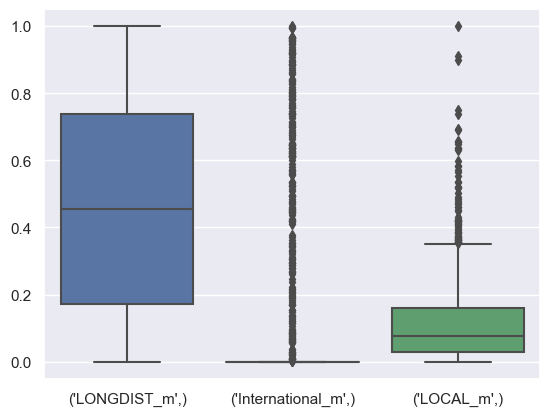

In [93]:
sns.boxplot(data=df_features_m);

In [94]:
# standard 
scaler_s = StandardScaler()
tele_features_s = scaler_s.fit_transform(df[feature_name])
df_features_s = pd.DataFrame(tele_features_s, columns=[['LONGDIST_s', 'International_s', 'LOCAL_s']])
df_features_s.describe()

,LONGDIST_s,International_s,LOCAL_s
count,1.477000e+03,1.477000e+03,1.477000e+03
mean,3.179583e-17,-6.464399e-18,-3.735822e-17
std,1.000339e+00,1.000339e+00,1.000339e+00
min,-1.452156e+00,-3.740359e-01,-9.387387e-01
25%,-9.012780e-01,-3.740359e-01,-6.934066e-01
50%,4.868003e-03,-3.740359e-01,-2.991001e-01
75%,8.988461e-01,-3.740359e-01,3.713036e-01
max,1.740455e+00,4.076077e+00,7.303874e+00


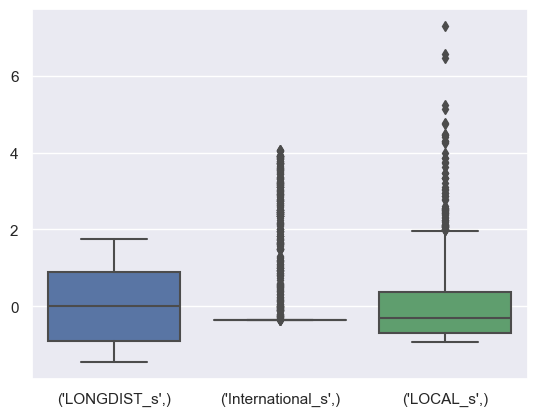

In [95]:
sns.boxplot(data=df_features_s);

### 스케일 조정 후 군집화
1. min-max version

In [118]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df_features_m)
predict = pd.DataFrame(model.predict(df_features_m))
data_cluster = pd.concat([df_features_m,predict],axis=1)
data_cluster.columns = ['LONGDIST_m', 'International_m', 'LOCAL_m', 'predict']
data_cluster.head()

,LONGDIST_m,International_m,LOCAL_m,predict
0,0.174985,0.755218,0.191486,2
1,0.000000,0.000000,0.008640,0
2,0.185299,0.000000,0.020672,0
3,0.467591,0.570846,0.066043,2
4,0.455740,0.297101,0.072328,1


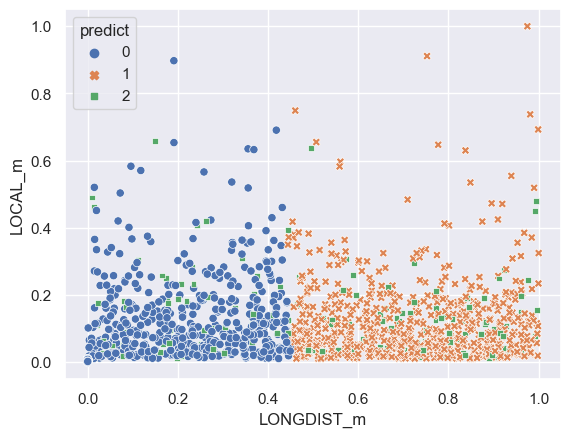

In [119]:
# 산점도 그리기
sns.scatterplot(data=data_cluster, x='LONGDIST_m', y='LOCAL_m'
                ,hue='predict', palette='deep', style='predict'
                );

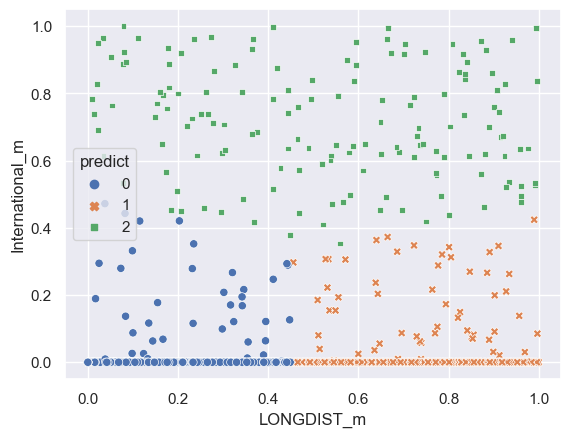

In [99]:
sns.scatterplot(data=data_cluster, x='LONGDIST_m', y='International_m'
                ,hue='predict', palette='deep', style='predict'
                );

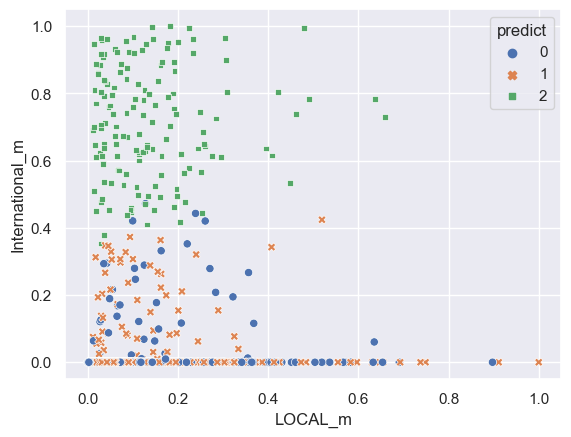

In [100]:
sns.scatterplot(data=data_cluster, x='LOCAL_m', y='International_m'
                ,hue='predict', palette='deep', style='predict'
                );

### 군집의 특징 파악하기
* 0번 : 세가지 통화 사용량이 모두 제일 적음
* 1번 : 장거리 통화 제일 많이, 시내 통화 많이, 국제 전화 적음
* 2번 : 국제 통화가 제일 높고, 시내 통화도 제일 높고, 장거리 통화 두 번쨰로 높음

In [103]:
data_cluster.groupby('predict').mean().style.background_gradient()

,LONGDIST_m,International_m,LOCAL_m
predict,,,
0,0.173336,0.010533,0.099960
1,0.720688,0.014740,0.122551
2,0.530922,0.711230,0.137308


### 최적의 군집수 판단하기
* 팔꿈치 (elbow) 방안
* [Tutorial: How to determine the optimal number of clusters for k-means clustering](https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f)

In [107]:
for i in range(2, 10):
    print(i)

2
3
4
5
6
7
8
9


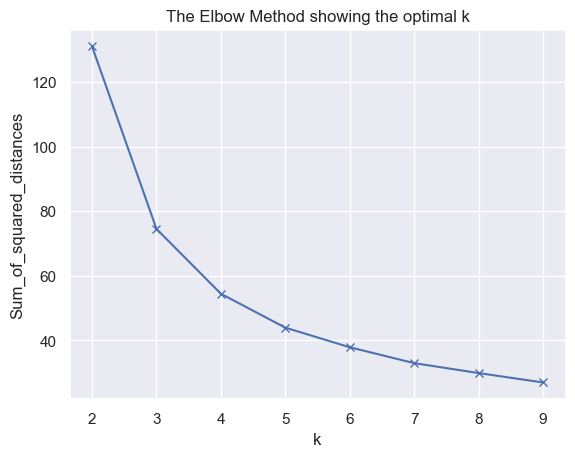

In [120]:
# k means determine k
Sum_of_squared_distances = [] 
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(df_features_m)
    Sum_of_squared_distances.append(km.inertia_)

# Plot the elbow
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

* 3 또는 4인 경우에 기울기 완만해지는 구간
* 군집수는 3 또는 4로 정할 수 있음.